# HR Analysis Job Prediction

### Objectives.

- Do Exploratory Data analysis to figure out which variables have a direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)
- Plot bar charts showing a correlation between department and employee retention
- Now build a logistic regression model using variables that were narrowed down in step 1
- Measure the accuracy of the model




## Step 1. Imports


### Import packages

In [60]:
# Import packages
### YOUR CODE HERE ### 

# For data manipulation
import numpy as np
import pandas as pd

#For data statistics
from scipy.stats import norm 
import statistics 

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# For data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# For saving models
import pickle

### Load dataset

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
### YOUR CODE HERE ###

df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)


### Gather basic information about the data

In [3]:
# Gather basic information about the data
### YOUR CODE HERE ###
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

In [5]:
# Display all column names
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed
### YOUR CODE HERE ###
df0 = df0.rename(columns={'Work_accident': 'work_accident',
                          'average_montly_hours': 'avg_monthly_hrs',
                          'time_spend_company': 'tenure',
                          'Department': 'department'})

# Display all column names after the update
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'avg_monthly_hrs', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [7]:
# Check for missing values
### YOUR CODE HERE ###
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
avg_monthly_hrs          0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [8]:
# Check for duplicates
### YOUR CODE HERE ###
df0.duplicated().sum()

3008

3008 duplicate rows represent 20.05% of the data. 

In [9]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
df0[df0.duplicated()].head()

,satisfaction_level,last_evaluation,number_project,avg_monthly_hrs,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###
df1 = df0.drop_duplicates(keep='first')

# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###
df1.head()

,satisfaction_level,last_evaluation,number_project,avg_monthly_hrs,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


The output above show the first few lines of duplicated data. Give the amount of information in the data, it is highly unlikely that 2 employees reported the exact same responses in all categories. It would be safe to assume that these observations can be dropped.

### Check outliers

Check for outliers in the data.

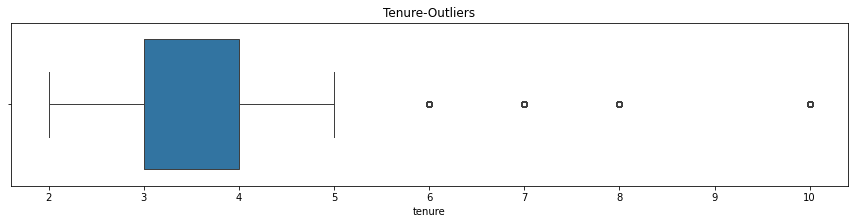

In [11]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###

plt.figure(figsize=(15,3))
plt.title('Tenure-Outliers')
sns.boxplot(x=df1['tenure']);
plt.show()

In [12]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###

#25 percentile value
percentile25 = df1['tenure'].quantile(0.25)

#75 percentile value
percentile75 = df1['tenure'].quantile(0.75)

iqr = percentile75 - percentile25

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

#Identify outliers (values below 25% & over 75%)
outliers = df1[(df1['tenure'] > upper_limit) | (df1['tenure'] < lower_limit)]

print("Number of rows in the data containing outliers in `tenure`:", len(outliers))

Lower limit: 1.5
Upper limit: 5.5
Number of rows in the data containing outliers in `tenure`: 824


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [13]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###
print(df1['left'].value_counts())

# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###
print(df1['left'].value_counts(normalize=True))


left
0    10000
1     1991
Name: count, dtype: int64
left
0    0.833959
1    0.166041
Name: proportion, dtype: float64


### Data visualizations

Let's start by creating a correlation map to see which variables present a positive or negative correlation so we can further analyze.

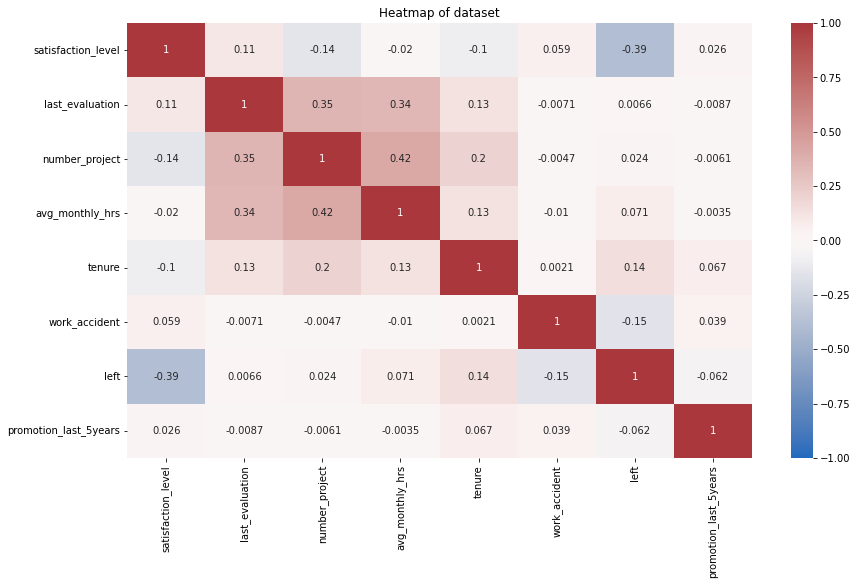

In [14]:
# Correlation Map

###  CODE  ###
plt.figure(figsize=(14,8))
heatmap = sns.heatmap(df0[['satisfaction_level', 'last_evaluation', 'number_project',
       'avg_monthly_hrs', 'tenure', 'work_accident', 'left',
       'promotion_last_5years']].corr(), vmin=-1, vmax=1, annot=True, cmap='vlag')
plt.title('Heatmap of dataset')
plt.show()

The correlation map shows some **positive** correlation between the followign variables:
- number of projects & evaluation
- average monthly hours & evaluations
- average monthly hours & number of projects


The correlation map shows some **negative** correlation between the employees who left & satisfaction level.

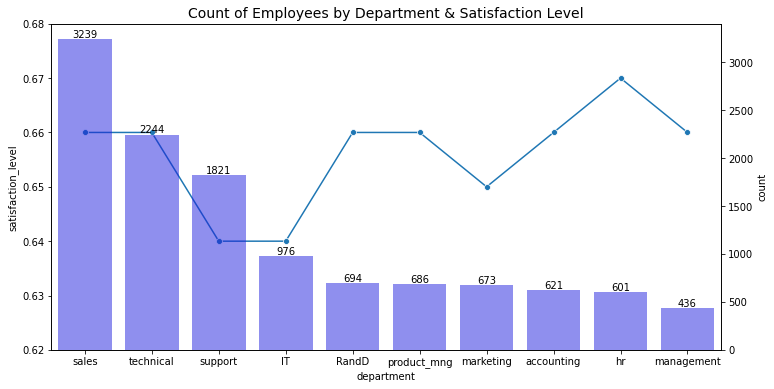

In [15]:
# Department vs. Satisfaction Level
### YOUR CODE HERE ###

#Calculating media of the satisfaction level per department
satisfaction_median = df1.groupby('department')['satisfaction_level'].median()

#Count number of employes per department
dpt_count = df1['department'].value_counts().reset_index(name='count')

#Plot figure
ax1 = sns.set_style(style=None, rc=None)

fig, ax1 = plt.subplots(figsize=(12,6))

sns.lineplot(data=satisfaction_median, marker='o', sort=False, ax=ax1)
ax2 = ax1.twinx()
ax1.set_ylim(.62,.68)

sns.barplot(data=dpt_count, x='department', y='count', alpha=0.5, ax=ax2, color='blue')
ax2.bar_label(ax2.containers[0])

plt.title('Count of Employees by Department & Satisfaction Level', fontsize='14');

The graph above shows  satisfaction level among all the different departments is relatively the same. It is important to note that some departments have more obervations than the others.

department   left
IT           0        818
             1        158
RandD        0        609
             1         85
accounting   0        512
             1        109
hr           0        488
             1        113
management   0        384
             1         52
marketing    0        561
             1        112
product_mng  0        576
             1        110
sales        0       2689
             1        550
support      0       1509
             1        312
technical    0       1854
             1        390
Name: count, dtype: int64

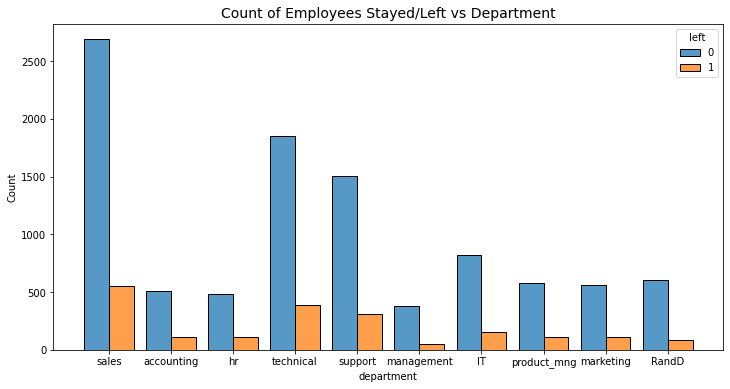

In [61]:
# Department vs. Retention 
### YOUR CODE HERE ###
plt.figure(figsize=(12,6))
sns.histplot(data=df1, x='department', hue='left', discrete=1, hue_order=[0,1], multiple='dodge', shrink=0.8)
plt.title('Count of Employees Stayed/Left vs Department', fontsize='14');

retention =  df1.groupby('department')['left'].value_counts()
retention

All departments seem to have a high retention rate, therefore, we can conclude that the department does not influence whether an employee stays or leaves. 

Next, let's look at the satisfaction level of employes who stayed vs. those who left.

In [17]:
#Calculate the satisfaction level of employees who stayed vs employees who left
satisfaction_level = df1.groupby(['left'])['satisfaction_level'].agg([np.mean,np.median])

satisfaction_level

,mean,median
left,,
0,0.667365,0.69
1,0.440271,0.41


As expected, the satisfaction level of employees who left is lower compared to the level of employees that stayed.

# Number of Projects & Evaluation

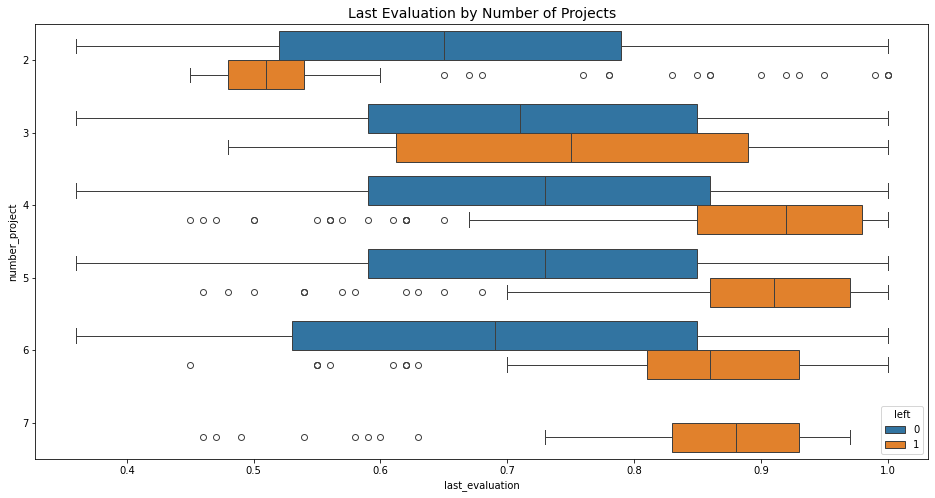

In [18]:
#Plot last evaluation number of porjects.

plt.figure(figsize= (16, 8))
ax = sns.boxplot(data=df1, x='last_evaluation', y='number_project', hue='left', orient="h")
plt.title('Last Evaluation by Number of Projects', fontsize='14')
sns.move_legend(ax, "lower right")

plt.show()

Observations:
- Employees with 2 years in the company who left received a low evaluation score.
- Employees with 4 or more projects who left received a high evaluation score. This could mean employees leaft because they feel overworked.

# Average Monthly Hours & Evaluation

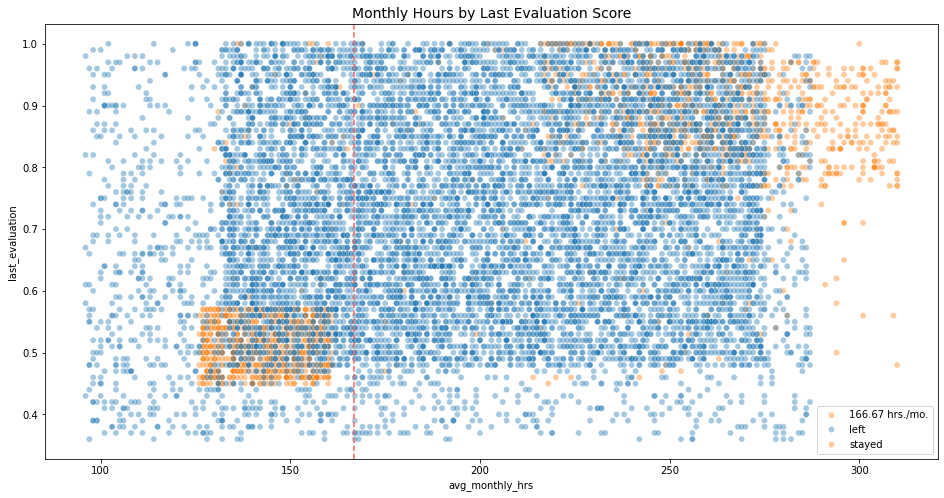

In [19]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(16, 8))
sns.scatterplot(data=df1, x='avg_monthly_hrs', y='last_evaluation', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly Hours by Last Evaluation Score', fontsize='14');

The following observations can be made from the scatterplot above:

- The scatterplot shows 2 groups of employees who left: overworked and with high evaluation score and employees who didn't performed as googd working less hours than the average (166.67 hrs/month).
- Most employees work more than average hours.

This matches what we observed in the previuos plot. Employees with high evaluation scores had 4+ projects, therefore, they probably were working a long hours.

# Average Monthly Hours & Number of Projects

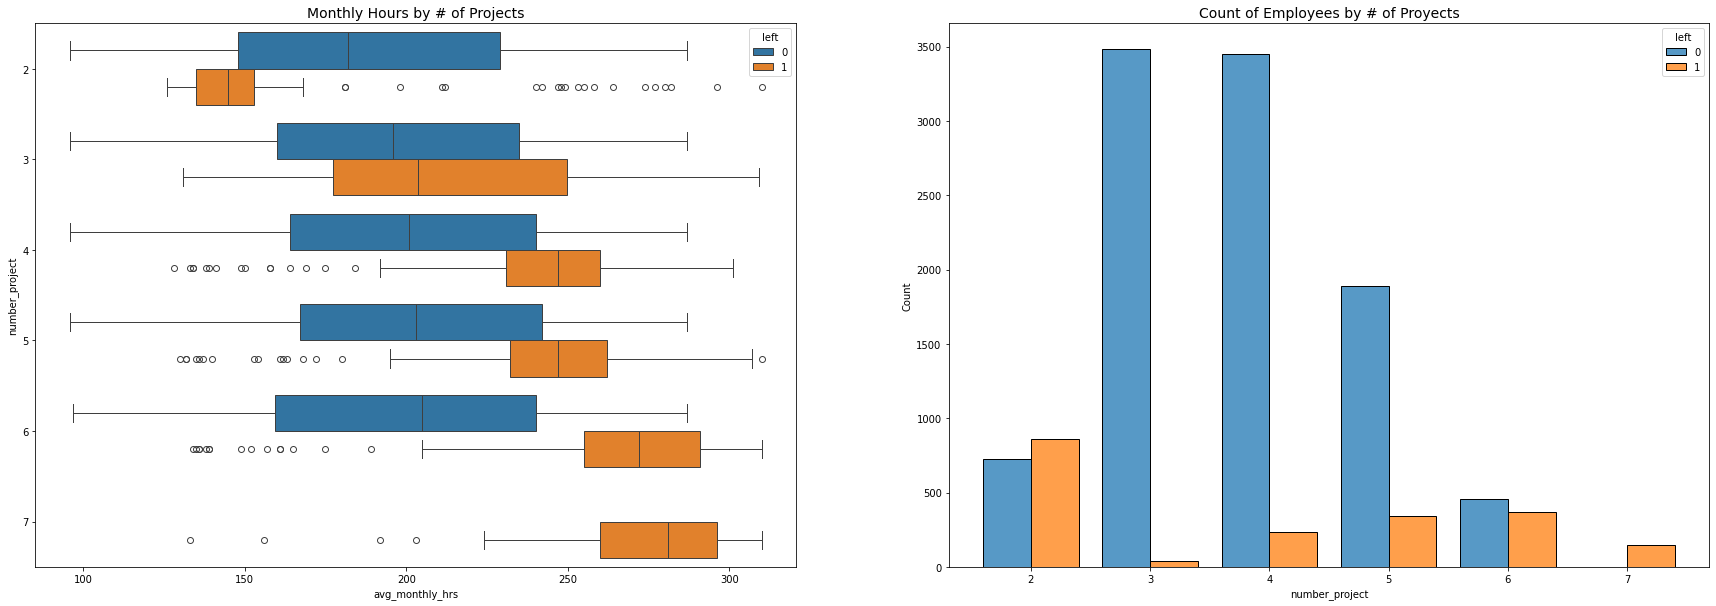

In [20]:
# Create a plot as needed
### YOUR CODE HERE ###

fig, ax = plt.subplots(1, 2, figsize = (30,10))

sns.boxplot(data=df1, x='avg_monthly_hrs', y='number_project', hue='left', orient="h", ax=ax[0])
ax[0].set_title('Monthly Hours by # of Projects', fontsize='14');

sns.histplot(data=df1, x='number_project', hue='left', discrete=1, hue_order=[0,1], multiple='dodge', shrink=0.8, ax=ax[1])
ax[1].set_title('Count of Employees by # of Proyects', fontsize='14')

plt.show()

- All employees with 7 projects left
- Employees with more projects tend to work more hours
- The vast majority of employees have between 2 and 5 projects with a high retention rate (Overworked emplooyes are more likely to leave)

# Monthly Hours vs Satisfaction Level

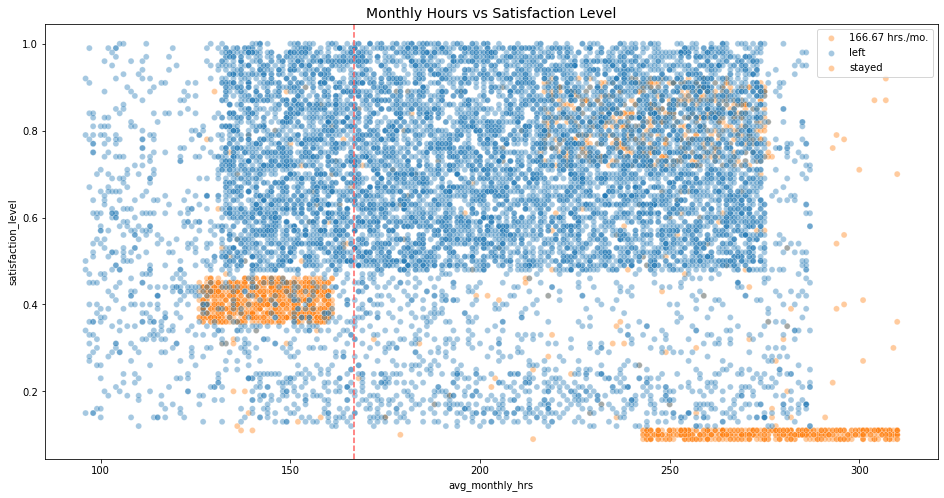

In [21]:
# Create a plot as needed
### YOUR CODE HERE ###

plt.figure(figsize=(16, 8))
sns.scatterplot(data=df1, x='avg_monthly_hrs', y='satisfaction_level', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly Hours vs Satisfaction Level', fontsize='14');

The following observations can be made from the scatterplot above:

- The scatterplot shows 3 groups of employees who left: 
    - Overworked employees (240+ hrs.) with low satisfaction level
    - Slightly dissatisfied employees (between ~.3-.5) working less than average hours
    - Highly satisfied (between ~.7-.9) employess working between ~215-270 hrs a month
  


# Tenure

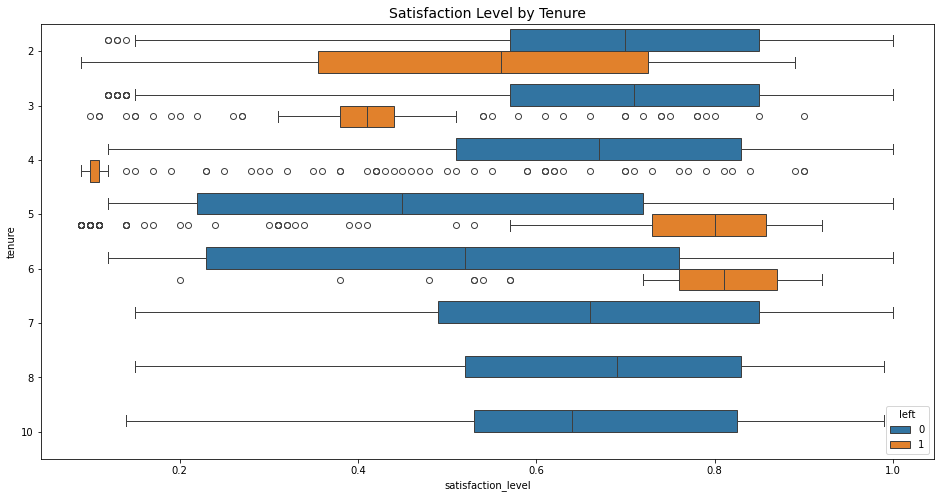

In [22]:
#Plot satisfaction level vs tenure.

plt.figure(figsize= (16, 8))
ax = sns.boxplot(data=df1, x='satisfaction_level', y='tenure', hue='left', orient="h")
plt.title('Satisfaction Level by Tenure', fontsize='14')
sns.move_legend(ax, "lower right")

plt.show()

The plot above shows that four-year emlpoyees who left were highly unsitisfied. It's worth investigating changes in position, salary or policy changes that may affect employee satisfaction. 

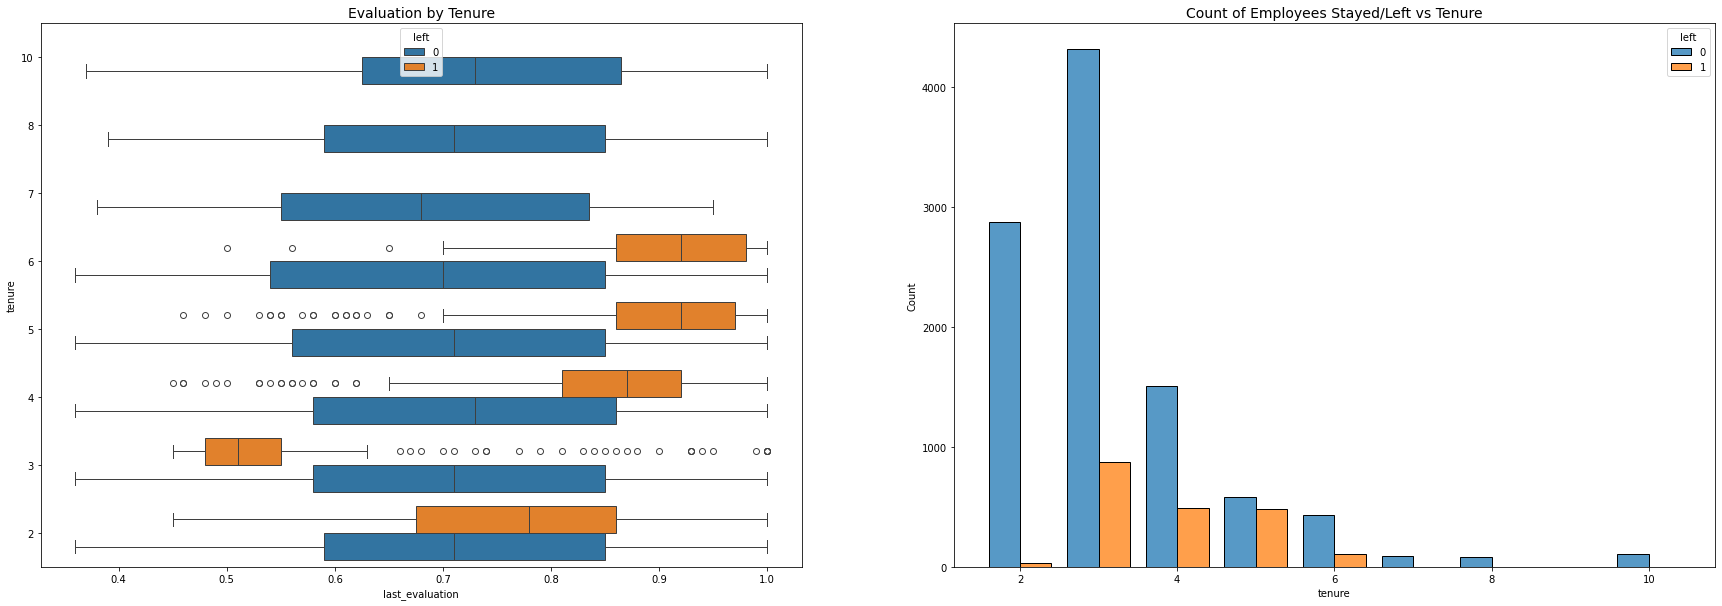

In [23]:
# Create a plot as needed
### YOUR CODE HERE ###

fig, ax = plt.subplots(1, 2, figsize = (30,10))

sns.boxplot(data=df1, x='last_evaluation', y='tenure', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Evaluation by Tenure', fontsize='14');

sns.histplot(data=df1, x='tenure', hue='left', discrete=1, hue_order=[0,1], multiple='dodge', shrink=0.8, ax=ax[1])
ax[1].set_title('Count of Employees Stayed/Left vs Tenure', fontsize='14')

plt.show()

Observations:
- Longest tenured employees didn't leave.
- Employees with 4, 5 & 6 years in the company who left received a score between .8 & 1. 

# Salary

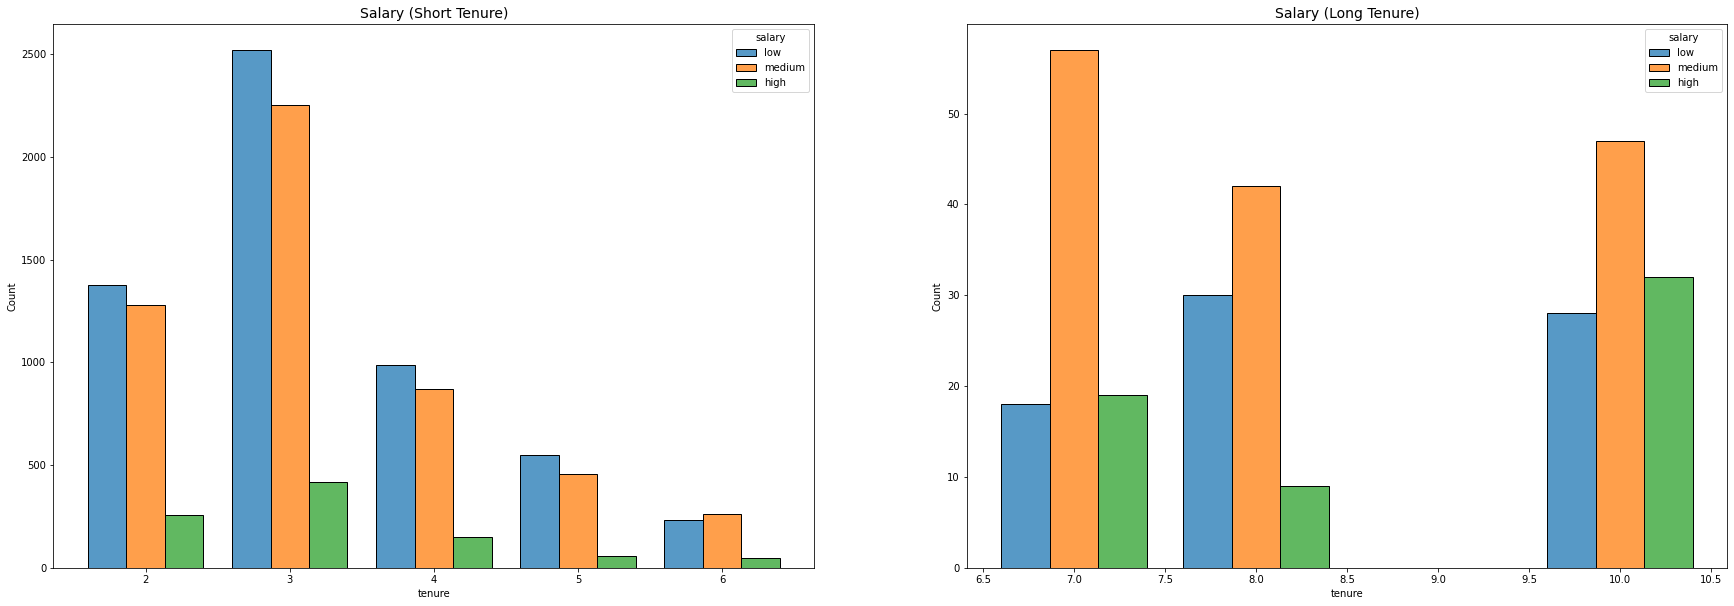

In [24]:
short_tenure = df1[df1['tenure'] < 7] 
long_tenure = df1[df1['tenure'] > 6]

fig, ax = plt.subplots(1, 2, figsize = (30,10))

sns.histplot(data=short_tenure, x='tenure', hue='salary', discrete=1, hue_order=['low', 'medium','high'], multiple='dodge', shrink=0.8, ax=ax[0])
ax[0].set_title('Salary (Short Tenure)', fontsize='14');

sns.histplot(data=long_tenure, x='tenure', hue='salary', discrete=1, hue_order=['low', 'medium','high'], multiple='dodge', shrink=0.8, ax=ax[1])
ax[1].set_title('Salary (Long Tenure)', fontsize='14');

Long tenured employees are not disproportionately overpaid. As expected, most of the employees with 2 or 3 years in the company have low & medium salaries. There are some employees with high salaries, but it could be due to background and/or job title.

### Insights

- Regardless of satisfaction level, overworked employees are more likely to leave.
- Employees with 7+ years of experience do not leave the company. This could mean better benefits and/or incentives.
- Ideal number of projects per employee is between 3 & 5.
- At the 4 year mark, some employees seem to be highly dissatisfied. This might be due to a promotion in title with more responsabilities and no significant salary increase.
- The vast makority of employees have a satisfaction level of at least 0.5.


## Step 3. Model Building, Step 4. Results and Evaluation


### Modeling Approach: Logistic Regression Model


In [25]:
# Copy the dataframe
df_enc = df1.copy()

# Encode the `salary` column as an ordinal numeric category
df_enc['salary'] = (
    df_enc['salary'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes
)

# Dummy encode the `department` column
df_enc = pd.get_dummies(df_enc, drop_first=False)

# Display the new dataframe
df_enc.head()

,satisfaction_level,last_evaluation,number_project,avg_monthly_hrs,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,1,0,1,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False


In [26]:
# Gather basic information about the data
### YOUR CODE HERE ###
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   avg_monthly_hrs        11991 non-null  int64  
 4   tenure                 11991 non-null  int64  
 5   work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   department             11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


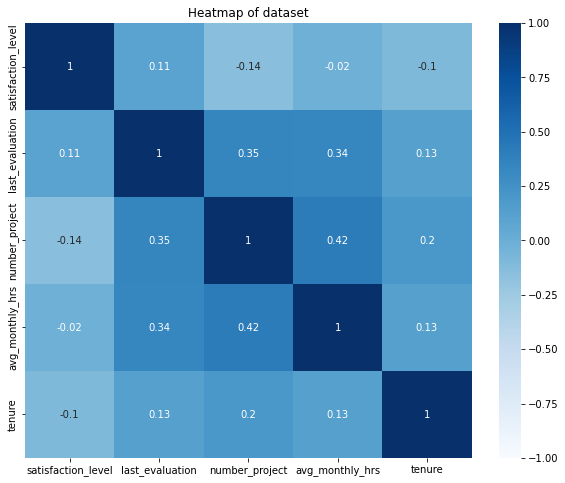

In [27]:
#Heatmap of correlated variables

plt.figure(figsize=(10,8))
heatmap = sns.heatmap(df0[['satisfaction_level', 'last_evaluation', 'number_project',
       'avg_monthly_hrs', 'tenure']].corr(), vmin=-1, vmax=1, annot=True, cmap='Blues')
plt.title('Heatmap of dataset')
plt.show()

In [28]:
# Select rows without outliers in `tenure` and save resulting dataframe in a new variable
df_logreg = df_enc[(df_enc['tenure'] >= lower_limit) & (df_enc['tenure'] <= upper_limit)]

# Display first few rows of new dataframe
df_logreg.head()

,satisfaction_level,last_evaluation,number_project,avg_monthly_hrs,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
5,0.41,0.50,2,153,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False


Isolate the outcome variable, which is the variable you want your model to predict.

In [33]:
# Display first few rows of the outcome variable
df_logreg['left'].value_counts(normalize=True)

left
0    0.831468
1    0.168532
Name: proportion, dtype: float64

Here we can see that the data is not completely balanced. Approximately 83.2% of the dataset represents employees whe stayed at the company and 16.2% represents employees who left.

In [48]:
#Use resampling to create a class balance in the outcome variable.

#Identify data points from majority & minority classes.
data_majority = df_logreg[df_logreg['left'] == 0]
data_minority = df_logreg[df_logreg['left'] == 1]

#Upsample the minority class (which is employes who left)
data_minority_upsampled = resample(data_minority, replace=True, n_samples=len(data_majority), random_state=42)

#Combine majority class with upsampled minority class
data_upsampled = pd.concat([data_majority, data_minority_upsampled]).reset_index(drop=True)

#Display new class counts
data_upsampled['left'].value_counts()

left
0    9285
1    9285
Name: count, dtype: int64

In [49]:
# Isolate the outcome variable
y = data_upsampled['left']

y.size

18570

In [50]:
#Drop left column from the data

X = data_upsampled.drop('left', axis=1)

X.head()

,satisfaction_level,last_evaluation,number_project,avg_monthly_hrs,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.58,0.74,4,215,3,0,0,0,False,False,False,False,False,False,False,True,False,False
1,0.82,0.67,2,202,3,0,0,0,False,False,False,False,False,False,False,True,False,False
2,0.45,0.69,5,193,3,0,0,0,False,False,False,False,False,False,False,True,False,False
3,0.78,0.82,5,247,3,0,0,0,False,False,False,False,False,False,False,True,False,False
4,0.49,0.60,3,214,2,0,0,0,False,False,False,False,False,False,False,True,False,False


Split the data into training and testing sets.

In [51]:
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Confirm that the dimensions of the training and testing sets are in alignment.

In [52]:
#Get shape of each training and testing set
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((13927, 18), (4643, 18), (13927,), (4643,))

**Notes:**
- The number of features (18) aligns between the training and testing sets.
- The number of rows aligns between the features and the outcome variable for training (13927) and testing (4643).

In [ ]:
#Check data types of features
X_train.dtypes

Construct a logistic regression model and fit it to the training dataset.

In [55]:
#Construct a logistic regression model and fit it to the training dataset
log_clf = LogisticRegression(random_state=42, max_iter=500).fit(X_train,y_train)

Test the logistic regression model: use the model to make predictions on the set test.

In [57]:
#Use the logistic regression model to get predictions on the test set
y_pred = log_clf.predict(X_test)

Create a confusion matrix to visualize the results of the logistic regression model.

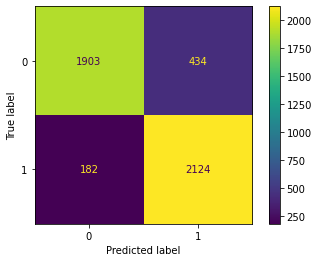

In [58]:
#Compute values for confusion matrix
log_cm = confusion_matrix(y_test, y_pred, labels=log_clf.classes_)
#Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=log_clf.classes_)
#Plot confusion matrix
log_disp.plot(values_format='')

# Display plot
plt.show()

The upper-left quadrant displays the number of true negatives. The upper-right quadrant displays the number of false positives. The bottom-left quadrant displays the number of false negatives. The bottom-right quadrant displays the number of true positives.

- True negatives: The number of people who did not leave that the model accurately predicted did not leave.

- False positives: The number of people who did not leave the model inaccurately predicted as leaving.

- False negatives: The number of people who left that the model inaccurately predicted did not leave. 

- True positives: The number of people who left the model accurately predicted as leaving.

A perfect model would yield all true negatives and true positives, and no false negatives or false positives.
Create a classification report that includes precision, recall, f1-score, and accuracy metrics to evaluate the performance of the logistic regression model.


In [59]:
#Create classification report for logistic regression model
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.91      0.81      0.86      2337
    Predicted would leave       0.83      0.92      0.87      2306

                 accuracy                           0.87      4643
                macro avg       0.87      0.87      0.87      4643
             weighted avg       0.87      0.87      0.87      4643



After balancing the data, the report above shows that the logistic regression model achieved a precision of 83%, recall of 92%, f1-score of 87% (of employees who left), and accuracy of 87%.

## Evaluation Metrics

- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






## Step 4. Results and Evaluation


### Summary of model results

The logistic regression model achieved precision of 83%, recall of 92%, f1-score of 87% (employees who left), and accuracy of 87%, on the test set.

### Conclusion, Recommendations, Next Steps

After the exploratory data analysis proces, it can be concluded that employees at the company are overworked.

To retain employees, the following recommendations could be presented to the managers or stakeholders:

- Cap the number of projects employees can work on.
- High evaluations scores should not be based on hours worked. Consider evaluating performance and/or contribution to the company or project.
- Offer additional compensation for those employees who work long hors, or don't require them to so. This drives employee dissatisfaction.
- Conduct further investigation of why employees with 4 years with the company who left were highly dissatisfied.